In [21]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, PULP_CBC_CMD

import matplotlib.pyplot as plt
import numpy as np

## Question 1: 

SteelCo manufactures three types of steel at two different steel mills.  During a given month, Mill 1 has 
200 hours of blast furnace time available, whereas Mill 2 has 300 hours.  Because of differences in the 
furnaces at each mill, the time and cost to produce a ton of steel differs for each mill and are shown in the 
following table.  Each month, SteelCo must manufacture a total of at least 400 tons of Steel 1, 500 tons of 
Steel 2, and 300 tons of Steel 3 to meet demand; however, the total amount of Steel 2 manufactured 
should not exceed the combined amount of Steel 1 and Steel 3.  Also, in order to maintain a roughly 
uniform usage of the two mills, management’s policy is that the percentage of available blast furnace 
capacity (time) used at each mill should be the same.  Clearly formulate a linear program (LP) to 
minimize the cost of manufacturing the desired steel. 

|      |Steel 1  |          |Steel 2  |          |Steel 3  |          |
|------|---------|----------|---------|----------|---------|----------|
|**Mill**  |**Cost (\$)**|**Time (Min)**|**Cost (\$)**|**Time (Min)**|**Cost (\$)**|**Time (Min)**|
|Mill 1|10       |20        |11       |22        |14       |28        |
|Mill 2|12       |24        |9        |18        |10       |30        |


In [2]:
# Set up the variables
steel_1_mill_1 = LpVariable("Steel_1_Produced_At_Mill_1", 0, None)
steel_2_mill_1 = LpVariable("Steel_2_Produced_At_Mill_1", 0, None)
steel_3_mill_1 = LpVariable("Steel_3_Produced_At_Mill_1", 0, None)
steel_1_mill_2 = LpVariable("Steel_1_Produced_At_Mill_2", 0, None)
steel_2_mill_2 = LpVariable("Steel_2_Produced_At_Mill_2", 0, None)
steel_3_mill_2 = LpVariable("Steel_3_Produced_At_Mill_2", 0, None)

# Objective Function Type
sc = LpProblem("SteelCo Manufacturing Problem", LpMinimize)

# Objective Function
sc += (10*steel_1_mill_1 + 11*steel_2_mill_1 + 14*steel_3_mill_1 + 
       12*steel_1_mill_2 + 9*steel_2_mill_2 + 10*steel_3_mill_2, "Total cost")

# Constraints
# Blast Furnance time available
sc += (20*steel_1_mill_1 + 22*steel_2_mill_1 + 28*steel_3_mill_1 <= 200*60, 
         "Mill 1 has 200 hours of blast furnace time available")
sc += (24*steel_1_mill_2 + 18*steel_2_mill_2 + 30*steel_3_mill_2 <= 300*60, 
         "Mill 2 has 300 hours of blast furnace time available")

## Each month, SteelCo must manufacture a total of at least 400 tons of Steel 1, 
## 500 tons of Steel 2, and 300 tons of Steel 3 to meet demand
sc += (1*steel_1_mill_1 + 1*steel_1_mill_2 >= 400, "Steel 1 Manufactured")
sc += (1*steel_2_mill_1 + 1*steel_2_mill_2 >= 500, "Steel 2 Manufactured")
sc += (1*steel_3_mill_1 + 1*steel_3_mill_2 >= 300, "Steel 3 Manufactured")

## the total amount of Steel 2 manufactured should not exceed the combined amount of Steel 1 and Steel 3
sc += (steel_2_mill_1 + steel_2_mill_2 <= steel_1_mill_1 + steel_1_mill_2 + steel_3_mill_1 + steel_3_mill_2, 
       "Steel 2 should not exceed the combined amount of Steel 1 and Steel 3")

## Also, in order to maintain a roughly uniform usage of the two mills, management’s policy is that
## the percentage of available blast furnace capacity (time) used at each mill should be the same.
sc += ((0.1*steel_1_mill_1 + 0.11*steel_2_mill_1 + 0.14*steel_3_mill_1) == 
       (0.08*steel_1_mill_2 + 0.06*steel_2_mill_2 + 0.1*steel_3_mill_2), 
         "Uniform usage of the two mills")

## Greater than 0 constraints
sc += (steel_1_mill_1 >= 0, "Steel 1 Mill 1 Non-negative Constraint")
sc += (steel_2_mill_1 >= 0, "Steel 2 Mill 1 Non-negative Constraint")
sc += (steel_3_mill_1 >= 0, "Steel 3 Mill 1 Non-negative Constraint")
sc += (steel_1_mill_2 >= 0, "Steel 1 Mill 2 Non-negative Constraint")
sc += (steel_2_mill_2 >= 0, "Steel 2 Mill 2 Non-negative Constraint")
sc += (steel_3_mill_2 >= 0, "Steel 3 Mill 2 Non-negative Constraint")

# Solve the problem
status = sc.solve(PULP_CBC_CMD(msg=0))

# Print the solution
print(f"Status: {LpStatus[status]}")
print(f"Minimum cost: {'${:,.2f}'.format(value(sc.objective))}")  ## formats automatically with commas at thou
for v in sc.variables():
    print(f'{v.name} = {v.varValue + 0}') # + 0 ensures no negative zeros

Status: Optimal
Minimum cost: $11,735.29
Steel_1_Produced_At_Mill_1 = 400.0
Steel_1_Produced_At_Mill_2 = 0.0
Steel_2_Produced_At_Mill_1 = 117.64706
Steel_2_Produced_At_Mill_2 = 382.35294
Steel_3_Produced_At_Mill_1 = 0.0
Steel_3_Produced_At_Mill_2 = 300.0


/Users/robords/.venv/basic_linear_programming/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## Question 2: 
Consider the following linear program:             
 
__Max__    
Z = -4x<sub>1</sub> + 2x<sub>2</sub> 

__Subject To__

-2x<sub>1</sub> + 2x<sub>2</sub> ≤ 7    
x<sub>1</sub> ≥ 2     
x<sub>1</sub> - 4x<sub>2</sub> ≤ 0     
2x<sub>1</sub> + 2x<sub>2</sub> ≥ 10     
x<sub>1</sub>, x<sub>2</sub> ≥ 0    
 
#### Part A:
Write the LP in standard equality form. 

Standard form:
* Must be a maximization problem
* Variables must be non-negative
* All functional constraints in non-negative form

__Max__    
Z = -4x<sub>1</sub> + 2x<sub>2</sub>
&check; Must be a maximization problem &check;

__Subject To__

-2x<sub>1</sub> + 2x<sub>2</sub> + s<sub>1</sub> = 7    (added a slack variable)    
x<sub>1</sub> + s<sub>2</sub> = 2     (added a surplus variable)    
x<sub>1</sub> - 4x<sub>2</sub> + s<sub>3</sub> = 0     (added a slack variable)    
2x<sub>1</sub> + 2x<sub>2</sub> + s<sub>4</sub> = 10   (added a surplus variable)      
&check; All functional constraints in non-negative form &check;

x<sub>1</sub>, x<sub>2</sub>, s<sub>1</sub>, s<sub>2</sub>, s<sub>3</sub>, s<sub>4</sub> ≥ 0   
&check; Variables must be non-negative &check;
 

 
#### Part B: 
Solve the original LP graphically (to scale).  Clearly identify the feasible region and, if one or 
more exist, the optimal solution(s) (provide exact values for x1, x2, and Z). 

In [ ]:
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# draw constraints
plt.axvline(7, color='g', label=r'$x_1 \geq 7$') # constraint 1
plt.axhline(8, color='r', label=r'$x_2 \geq 8$') # constraint 2
plt.plot(x_1, (2*(x_1)), label=r'$x_2 \leq 2x_1$') # constraint 3
plt.plot(x_1, 25 - (1.5*x_1), label=r'$1.5x_1 + x_2 \leq 25$') # constraint 4


plt.xlim((0, 25))
plt.ylim((0, 30))
plt.xlabel(r'Number of keyboards ($x_1$)')
plt.ylabel(r'Number of mice ($x_2$)')

# fill in the fesaible region
plt.fill_between(x_1, np.minimum(25 - (1.5*x_1), (2*(x_1))), np.minimum(25 - (1.5*x_1), 8), 
where=x_1 >= 7,
color='green', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

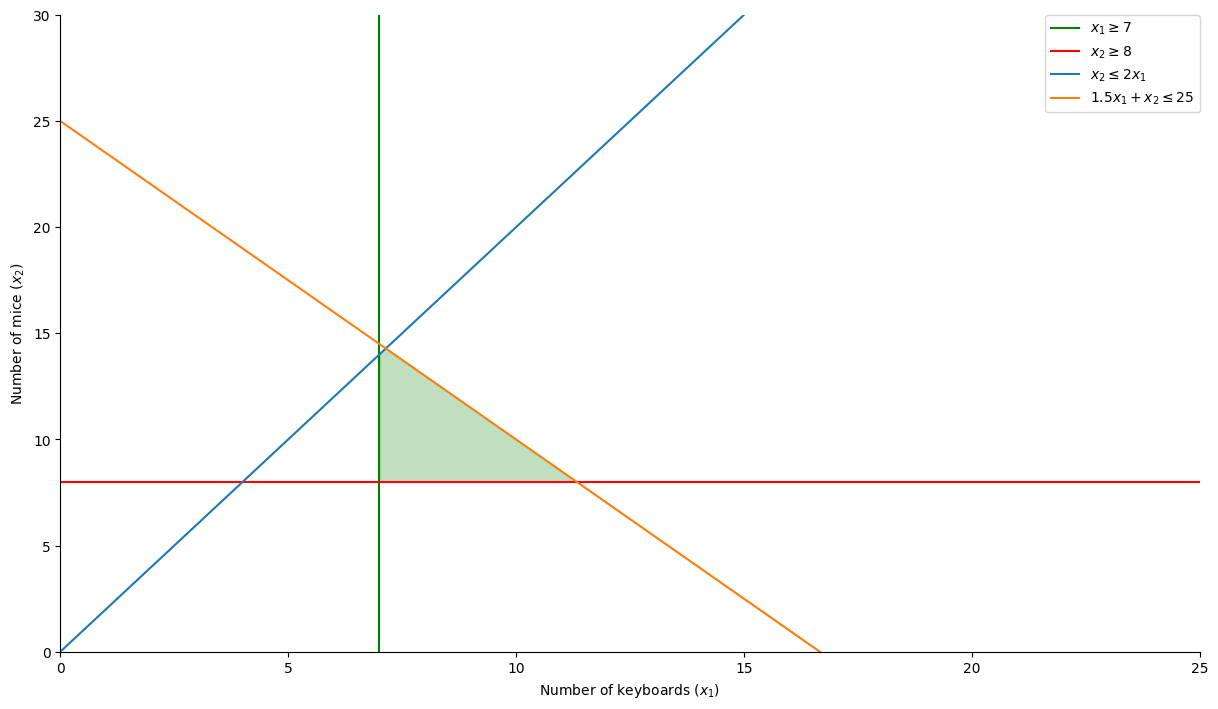

In [22]:
# https://paulminogue.com/posts/71924725-4c6f-46eb-b732-b5806ddc0152#heading-6fad651e-2fff-49b7-85a0-5d2ada387059
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# draw constraints
plt.axvline(7, color='g', label=r'$x_1 \geq 7$') # constraint 1
plt.axhline(8, color='r', label=r'$x_2 \geq 8$') # constraint 2
plt.plot(x_1, (2*(x_1)), label=r'$x_2 \leq 2x_1$') # constraint 3
plt.plot(x_1, 25 - (1.5*x_1), label=r'$1.5x_1 + x_2 \leq 25$') # constraint 4


plt.xlim((0, 25))
plt.ylim((0, 30))
plt.xlabel(r'Number of keyboards ($x_1$)')
plt.ylabel(r'Number of mice ($x_2$)')

# fill in the fesaible region
plt.fill_between(x_1, np.minimum(25 - (1.5*x_1), (2*(x_1))), np.minimum(25 - (1.5*x_1), 8), 
where=x_1 >= 7,
color='green', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Text(0, 0.5, '$y$')

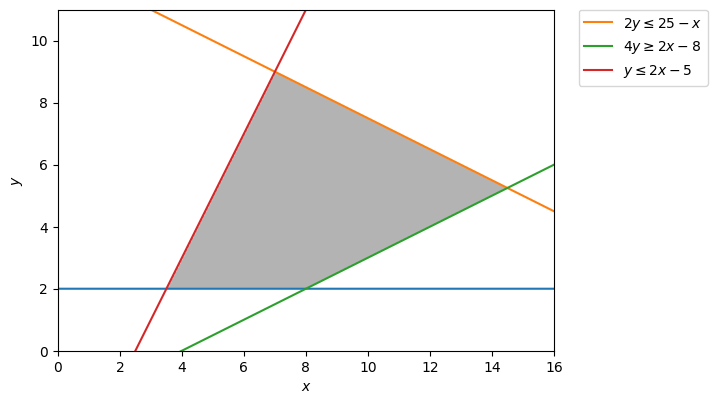

In [23]:
# https://stackoverflow.com/questions/57017444/how-to-visualize-feasible-region-for-linear-programming-with-arbitrary-inequali
# plot the feasible region
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (2*y<=25-x) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000) # 2000 linearly spaced numbers
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x - 5

# Make plot
plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

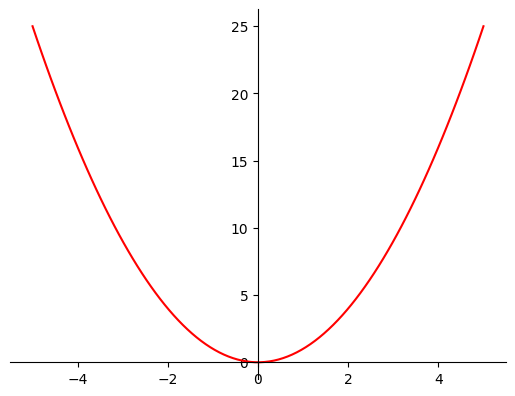

In [19]:
# https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

## Question 3: 

At the beginning of month 1, Finco has \$400 in cash.  At the beginning of months 1, 2, 3, and 4, Finco 
receives certain revenues, after which it pays bills (see Table 2 below).  Any money left over may be 
invested for one month at the interest rate of 0.1\% per month; for two months at 0.5\% per month; for 
three months at 1\% per month; or for four months at 2\% per month.  Use linear programming to 
determine an investment strategy that maximizes cash on hand at the beginning of month 5.  Formulate an 
LP to maximize Finco’s profit. 
 
| Month | Revenues (\$) | Bills (\$) |
|------|---------|----------|
| 1 | 400 | 600  |
| 2 | 800 | 500  |
| 3 | 300 | 500  |
| 4 | 300 | 250  |


Regarding Question 3, the objective is to maximize the amount of cash on hand at the beginning of Period 5.  (Not necessarily to maximize profit.)

In [17]:
# Set up the variables
## We only need 10 variables because we don't care about beyond the beginning of the 5th month
month_1_for_one_month = LpVariable("Cash to Invest Month 1 for one month", 0, None)
month_1_for_two_month = LpVariable("Cash to Invest Month 1 for two months", 0, None)
month_1_for_three_month = LpVariable("Cash to Invest Month 1 for three months", 0, None)
month_1_for_four_month = LpVariable("Cash to Invest Month 1 for four months", 0, None)

month_2_for_one_month = LpVariable("Cash to Invest Month 2 for one month", 0, None)
month_2_for_two_month = LpVariable("Cash to Invest Month 2 for two months", 0, None)
month_2_for_three_month = LpVariable("Cash to Invest Month 2 for three months", 0, None)

month_3_for_one_month = LpVariable("Cash to Invest Month 3 for one month", 0, None)
month_3_for_two_month = LpVariable("Cash to Invest Month 3 for two months", 0, None)

month_4_for_one_month = LpVariable("Cash to Invest Month 4 for one month", 0, None)

# Objective Function Type
fc = LpProblem("Finco Investing Problem", LpMaximize)

# Objective Function
fc += ((1.08*month_1_for_four_month) + (1.03*month_2_for_three_month) + 
       (1.01*month_3_for_two_month) + (1.001*month_4_for_one_month), "Total Cash on Hand Beginning of Month 5")

# Constraints
# Revenue to Invest
fc += (month_1_for_one_month + month_1_for_two_month + month_1_for_three_month + 
       month_1_for_four_month <= 800, 
       "Beginning of Month 1 has 400 Dollars from Revenue to Invest and 400 Cash")

fc += (month_2_for_one_month + month_2_for_two_month + month_2_for_three_month +
       ((1.001*month_1_for_one_month) - 600) <= 800, 
       "Beginning of Month 2 has 800 Dollars to Invest, plus any money left from a one-month investment after paying our Month 1 Bill")

fc += (month_3_for_one_month + month_3_for_two_month + 
       (((1.01*month_1_for_two_month) + (1.001*month_2_for_one_month)) - 500) <= 300, 
       "Beginning of Month 3 has 300 Dollars to Invest, plus any money left from investments after paying our Month 1 and 2 Bills")

fc += (month_4_for_one_month + (((1.03*month_1_for_three_month) + (1.01*month_2_for_two_month) + 
       (1.001*month_3_for_one_month)) - 500) <= 300, 
       "Beginning of Month 4 has 300 Dollars to Invest, plus any money left from investments after paying our Month 1, 2 and 3 Bills")


# Bills to Pay
fc += ((1.001*month_1_for_one_month) >= 600, 
       "End of Month 1has a Bill that is 600 Dollars")

fc += ((1.01*month_1_for_two_month) + (1.001*month_2_for_one_month) >= 500, 
       "End of Month 2 has a Bill that is 500 Dollars")

fc += ((1.03*month_1_for_three_month) + (1.01*month_2_for_two_month) + 
       (1.001*month_3_for_one_month)  >= 500, 
       "End of Month 3 has a Bill that is 500 Dollars")

fc += ((1.08*month_1_for_four_month) + (1.03*month_2_for_three_month) + 
       (1.01*month_3_for_two_month) + (1.001*month_4_for_one_month) >= 250, 
       "End of Month 4 has a Bill that is 250 Dollars")


## Greater than 0 constraints
for v in fc.variables():
    fc += (v >= 0, f"{v.name} Non-negative Constraint")

# Solve the problem
status = fc.solve(PULP_CBC_CMD(msg=0))

# Print the solution
print(f"Status: {LpStatus[status]}")
print("*"*40)
print(f"Maximum Cash on Hand at the beginning of Month 5: {'${:,.2f}'.format(value(fc.objective)-250)}")
print(f"{'${:,.2f}'.format(value(fc.objective)-250)} is the amount we had at the end of the fourth month, {'${:,.2f}'.format(value(fc.objective))}, less the $250.00 Month 4 Bill")
print("*"*40)
for v in fc.variables():
    print(f"{v.name} = {'${:,.2f}'.format(value(v.varValue + 0))}") # + 0 ensures no negative zeros
    

Status: Optimal
****************************************
Maximum Cash on Hand at the beginning of Month 5: $372.81
$372.81 is the amount we had at the end of the fourth month, $622.81, less the $250.00 Month 4 Bill
****************************************
Cash_to_Invest_Month_1_for_four_months = $200.60
Cash_to_Invest_Month_1_for_one_month = $599.40
Cash_to_Invest_Month_1_for_three_months = $0.00
Cash_to_Invest_Month_1_for_two_months = $0.00
Cash_to_Invest_Month_2_for_one_month = $499.50
Cash_to_Invest_Month_2_for_three_months = $102.78
Cash_to_Invest_Month_2_for_two_months = $197.72
Cash_to_Invest_Month_3_for_one_month = $300.00
Cash_to_Invest_Month_3_for_two_months = $0.00
Cash_to_Invest_Month_4_for_one_month = $300.00


## Question 4: 

Turkeyco produces two types of turkey cutlets for sale to fast-food restaurants.  Each type of cutlet 
consists of white meat and dark meat.  Cutlet 1 sells for \\$4/lb and must consist of at least 70\% white 
meat.  Cutlet 2 sells for \\$3/lb and must consist of at least 60\% white meat.  At most, 50 lb of cutlet 1 and 
30 lb of cutlet 2 can be sold.  The two types of turkey used to manufacture the cutlets are purchased from 
the GobbleGobble Turkey Farm.  Each type 1 turkey costs \\$10 and yields 5 lb of white meat and 2 lb of 
dark meat.  Each type 2 turkey costs \\$8 and yields 3 lb of white meat and 3 lb of dark meat.   
 
Part A:  Formulate an LP to maximize Turkeyco’s profit. 
 
Part B:  Solve the LP (provide exact values for all variables and the optimal objective function). 


In [7]:
# Set up the variables
cutlet_1_white = LpVariable("Cutlet_1_White_Meat_Produced", 0, None)
cutlet_1_dark = LpVariable("Cutlet_1_Dark_Meat_Produced", 0, None)
cutlet_2_white = LpVariable("Cutlet_2_White_Meat_Produced", 0, None)
cutlet_2_dark = LpVariable("Cutlet_2_Dark_Meat_Produced", 0, None)

type_1_turkey = LpVariable("Type_1_Turkey_Bought", 0, None, cat="Integer")
type_2_turkey = LpVariable("Type_2_Turkey_Bought", 0, None, cat="Integer")

# Objective Function Type
tc = LpProblem("Turkeyco Profit Problem", LpMaximize)

# Objective Function
tc += ((4*(cutlet_1_white + cutlet_1_dark) + 3*(cutlet_2_white + cutlet_2_dark)) - 
       (10*type_1_turkey + 8*type_2_turkey), "Total Profit")

# Constraints
#White meat percentage
tc += (cutlet_1_white >= .7*(cutlet_1_white + cutlet_1_dark),
         "Cutlet 1 must consist of at least 70% white meat")
tc += (cutlet_2_white >= .6*(cutlet_2_white + cutlet_2_dark),
         "Cutlet 2 must consist of at least 60% white meat")

#Turkey Meat Types
tc += (5*type_1_turkey + 3*type_2_turkey >= cutlet_1_white + cutlet_2_white,
         "Turkey 1 yields 5 lb of white meat and 2 yields 3 lb of white meat")
tc += (2*type_1_turkey + 3*type_2_turkey >= cutlet_1_dark + cutlet_2_dark,
         "Turkey 1 yields 2 lb of dark meat and 2 yields 3 lb of dark meat")

#At most, 50 lb of cutlet 1 and 30 lb of cutlet 2 can be sold
tc += (cutlet_1_white + cutlet_1_dark <= 50,
         "50 lb of cutlet 1 can be sold")
tc += (cutlet_2_white + cutlet_2_dark <= 30,
         "30 lb of cutlet 2 can be sold")

## Greater than 0 constraints
tc += (cutlet_1_white >= 0, "Cutlet 1 White Non-negative Constraint")
tc += (cutlet_1_dark >= 0, "Cutlet 1 Dark Non-negative Constraint")
tc += (cutlet_2_white >= 0, "Cutlet 2 White Non-negative Constraint")
tc += (cutlet_2_dark >= 0, "Cutlet 2 Dark Non-negative Constraint")
tc += (type_1_turkey >= 0, "Turkey 1 Non-negative Constraint")
tc += (type_2_turkey >= 0, "Turkey 2 Non-negative Constraint")

# Solve the problem
status = tc.solve(PULP_CBC_CMD(msg=0))

# Print the solution
print(f"Status: {LpStatus[status]}")
print(f"Objective - Maximum Profit: {'${:,.2f}'.format(value(tc.objective))}")  ## formats automatically with commas at thou
for v in tc.variables():
    print(f'{v.name} = {v.varValue + 0} lbs') # + 0 ensures no negative zeros
    

Status: Optimal
Objective - Maximum Profit: $176.00
Cutlet_1_Dark_Meat_Produced = 15.0 lbs
Cutlet_1_White_Meat_Produced = 35.0 lbs
Cutlet_2_Dark_Meat_Produced = 12.0 lbs
Cutlet_2_White_Meat_Produced = 18.0 lbs
Type_1_Turkey_Bought = 9.0 lbs
Type_2_Turkey_Bought = 3.0 lbs


### Question 5: 
A company wants to plan production for the ensuing year to minimize the combined cost of production 
and inventory costs.  In each quarter of the year, demand is anticipated to be 130, 160, 250, and 150 units, 
respectively.  The plant can produce a maximum of 200 units each quarter.  The product can be 
manufactured at a cost of \\$15 per unit during the first quarter, however the manufacturing cost is expected 
to rise by \\$1 per quarter.  Excess production can be stored from one quarter to the next at a cost of \\$1.50 
per unit, but the storage facility can hold a maximum of 60 units.  How should the production be 
scheduled so as to minimize the total costs?   
 
Part A:  Formulate an LP model to minimize costs. 
 
Part B:  Solve the LP (provide exact values for all variables and the optimal objective function). 

In [8]:
# Set up the variables
q1_produced_for_sale_in_quarter = LpVariable("Units Produced in Q1 For Same Quarter Sale", 0, None)
q2_produced_for_sale_in_quarter = LpVariable("Units Produced in Q2 For Same Quarter Sale", 0, None)
q3_produced_for_sale_in_quarter = LpVariable("Units Produced in Q3 For Same Quarter Sale", 0, None)
q4_produced_for_sale_in_quarter = LpVariable("Units Produced in Q4 For Same Quarter Sale", 0, None)

q1_produced_for_inventory = LpVariable("Units Produced in Q1 and Inventoried for Q2", 0, None)
q2_produced_for_inventory = LpVariable("Units Produced in Q2 and Inventoried for Q3", 0, None)
q3_produced_for_inventory = LpVariable("Units Produced in Q3 and Inventoried for Q4", 0, None)
## Assumes Q1 of the following year won't need units from inventory (we don't have demand at this time)

# Objective Function Type
ac = LpProblem("Anonymous Company Minimize Costs Problem", LpMinimize)

# Objective Function
ac += (15*q1_produced_for_sale_in_quarter + 16*q2_produced_for_sale_in_quarter + 
       17*q3_produced_for_sale_in_quarter + 18*q4_produced_for_sale_in_quarter + 
       (1.50 + 15)*q1_produced_for_inventory + 
       (1.50 + 16)*q2_produced_for_inventory + 
       (1.50 + 17)*q3_produced_for_inventory, "Total Costs")

# Constraints
#Demand is anticipated to be 130, 160, 250, and 150 units, respectively
ac += (q1_produced_for_sale_in_quarter >= 130, "Demand is anticipated to be 130 in Q1")
ac += (q2_produced_for_sale_in_quarter + q1_produced_for_inventory >= 160, "Demand is anticipated to be 160 in Q2")
ac += (q3_produced_for_sale_in_quarter + q2_produced_for_inventory >= 250, "Demand is anticipated to be 250 in Q3")
ac += (q4_produced_for_sale_in_quarter + q3_produced_for_inventory >= 150, "Demand is anticipated to be 150 in Q4")

#The plant can produce a maximum of 200 units each quarter
ac += (q1_produced_for_sale_in_quarter + q1_produced_for_inventory <= 200, "The plant can produce a maximum of 200 units in Q1")
ac += (q2_produced_for_sale_in_quarter + q2_produced_for_inventory<= 200, "The plant can produce a maximum of 200 units in Q2")
ac += (q3_produced_for_sale_in_quarter + q3_produced_for_inventory <= 200, "The plant can produce a maximum of 200 units in Q3")
ac += (q4_produced_for_sale_in_quarter <= 200, "The plant can produce a maximum of 200 units in Q4")

#The storage facility can hold a maximum of 60 units.
ac += (q1_produced_for_inventory <= 60, "The storage facility can hold a maximum of 60 units for Q2")
ac += (q2_produced_for_inventory <= 60, "The storage facility can hold a maximum of 60 units for Q3")
ac += (q3_produced_for_inventory <= 60, "The storage facility can hold a maximum of 60 units for Q4")

## Greater than 0 constraints
for v in ac.variables():
    ac += (v >= 0, f"{v.name} Non-negative Constraint")

# Solve the problem
status = ac.solve(PULP_CBC_CMD(msg=0))

# Print the solution
print(f"Status: {LpStatus[status]}")
print(f"Objective - Minimize Cost: {'${:,.2f}'.format(value(ac.objective))}")  ## formats automatically with commas at thou
print("*"*40)
for v in ac.variables():
    print(f'{v.name} = {v.varValue + 0}') # + 0 ensures no negative zeros

print("*"*40)
print(f'Total Units Produced in Q1 = {q1_produced_for_sale_in_quarter.varValue + q1_produced_for_inventory.varValue}')
print(f'Total Units Produced in Q2 = {q2_produced_for_sale_in_quarter.varValue + q2_produced_for_inventory.varValue}')
print(f'Total Units Produced in Q3 = {q3_produced_for_sale_in_quarter.varValue + q3_produced_for_inventory.varValue}')
print(f'Total Units Produced in Q4 = {q4_produced_for_sale_in_quarter.varValue}')


Status: Optimal
Objective - Minimize Cost: $11,490.00
****************************************
Units_Produced_in_Q1_For_Same_Quarter_Sale = 130.0
Units_Produced_in_Q1_and_Inventoried_for_Q2 = 10.0
Units_Produced_in_Q2_For_Same_Quarter_Sale = 150.0
Units_Produced_in_Q2_and_Inventoried_for_Q3 = 50.0
Units_Produced_in_Q3_For_Same_Quarter_Sale = 200.0
Units_Produced_in_Q3_and_Inventoried_for_Q4 = 0.0
Units_Produced_in_Q4_For_Same_Quarter_Sale = 150.0
****************************************
Total Units Produced in Q1 = 140.0
Total Units Produced in Q2 = 200.0
Total Units Produced in Q3 = 200.0
Total Units Produced in Q4 = 150.0
